In [17]:
import pandas as pd
import matplotlib.pyplot as mtp
import numpy as np
from apyori import apriori 
import seaborn as sns
from string import printable
# import tabulate as tb

file_path = 'data\\datasets.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

   Apple  Beer  Rice  Chicken
0  Apple  Beer  Rice      NaN
1  Apple  Beer   NaN      NaN
2  Apple  Pear   NaN      NaN
3   Milk  Beer  Rice  Chicken
4   Milk  Beer  Rice      NaN


In [3]:
# Assuming your data frame has columns representing items and rows representing transactions
item_columns = data.columns.tolist()
transaction_list = []

In [4]:
for index, row in data.iterrows():
    transaction = [item for item in item_columns if row[item] == 1]
    transaction_list.append(transaction)
print(transaction_list[:5])  # Display the first few transactions to verify the format

[[], [], [], [], []]


In [5]:
freqItemSet, rules = apriori(transaction_list, minSup=0.5, minConf=0.5)
print("Frequent Itemsets:")
print(freqItemSet)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
{}

Association Rules:
[]


In [14]:
from string import printable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
# import tabulate as tb
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, fpmax

data_sets = pd.read_csv("data\\datasets.csv")
print("\n")
print(data_sets)

waw = [["Apple", "Beer", "Rice", "Chicken"],
       ["Apple", "Beer", "Rice"],
       ["Apple", "Beer"],
       ["Apple", "Pear"],
       ["Milk", "Beer", "Rice", "Chicken"],
       ["Milk", "Beer", "Rice"],
       ["Milk", "Beer"],
       ["Milk", "Pear"]]

te = TransactionEncoder()
item = te.fit(waw).transform(waw)
# TransactionEncoder object, we can transform this dataset into an array format suitable for typical machine learning APIs.
# Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method,
# it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array:
df = pd.DataFrame(item, columns=te.columns_)
num_records = len(df)
print("\nNumber of records in dataframe", num_records)
print("Converted to Dataframe\n", df)




   Apple  Beer  Rice  Chicken
0  Apple  Beer  Rice      NaN
1  Apple  Beer   NaN      NaN
2  Apple  Pear   NaN      NaN
3   Milk  Beer  Rice  Chicken
4   Milk  Beer  Rice      NaN
5   Milk  Beer   NaN      NaN
6   Milk  Pear   NaN      NaN

Number of records in dataframe 8
Converted to Dataframe
    Apple   Beer  Chicken   Milk   Pear   Rice
0   True   True     True  False  False   True
1   True   True    False  False  False   True
2   True   True    False  False  False  False
3   True  False    False  False   True  False
4  False   True     True   True  False   True
5  False   True    False   True  False   True
6  False   True    False   True  False  False
7  False  False    False   True   True  False


In [15]:
# Apply the Apriori algorithm
min_support = 0.5  # Minimum support threshold
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.5  # Minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

print("\nAssociation Rules:\n", rules)


Frequent Itemsets:
    support      itemsets
0     0.50       (Apple)
1     0.75        (Beer)
2     0.50        (Milk)
3     0.50        (Rice)
4     0.50  (Beer, Rice)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0      (Beer)      (Rice)                0.75                0.50      0.5   
1      (Rice)      (Beer)                0.50                0.75      0.5   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.666667  1.333333     0.125         1.5            1.0  
1    1.000000  1.333333     0.125         inf            0.5  


In [20]:
#from asyncio.windows_events import null
import csv
from string import printable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
#import tabulate as tb
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
data_sets = pd.read_csv("data./datasets.csv")
print("\n")
print(data_sets)

waw = [["Apple", "Beer", "Rice", "Chicken"],
       ["Apple", "Beer", "Rice"],
        ["Apple","Beer"],
        ["Apple", "Pear"],
        ["Milk","Beer", "Rice", "Chicken"],
        ["Milk","Beer", "Rice"],
        ["Milk","Beer"],
        ["Milk","Pear"]]

te = TransactionEncoder()
item = te.fit(waw).transform(waw)
#TransactionEncoder object, we can transform this dataset into an array format suitable for typical machine learning APIs.
#Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method,
#it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array:
df = pd.DataFrame(item,columns = te.columns_)
num_records = len(df)
print("\n number of records in dataframe",num_records)
print("Converted to Dataframe \n",df)



frequent_itemsets= apriori(df,min_support = .2, use_colnames = True,max_len = 4)
print("\n",frequent_itemsets)
association_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold =.50)  
print("\n",association_rules.to_string())
#The generate_rules takes dataframes of frequent itemsets as produced by the apriori,
#fpgrowth, or fpmax functions in mlxtend.association. To demonstrate the usage of the generate_rules method,
#we first create a pandas DataFrame of frequent itemsets as generated by the fpgrowth function:

       




   Apple  Beer  Rice  Chicken
0  Apple  Beer  Rice      NaN
1  Apple  Beer   NaN      NaN
2  Apple  Pear   NaN      NaN
3   Milk  Beer  Rice  Chicken
4   Milk  Beer  Rice      NaN
5   Milk  Beer   NaN      NaN
6   Milk  Pear   NaN      NaN

 number of records in dataframe 8
Converted to Dataframe 
    Apple   Beer  Chicken   Milk   Pear   Rice
0   True   True     True  False  False   True
1   True   True    False  False  False   True
2   True   True    False  False  False  False
3   True  False    False  False   True  False
4  False   True     True   True  False   True
5  False   True    False   True  False   True
6  False   True    False   True  False  False
7  False  False    False   True   True  False

     support               itemsets
0     0.500                (Apple)
1     0.750                 (Beer)
2     0.250              (Chicken)
3     0.500                 (Milk)
4     0.250                 (Pear)
5     0.500                 (Rice)
6     0.375          (Apple, Beer)
7 

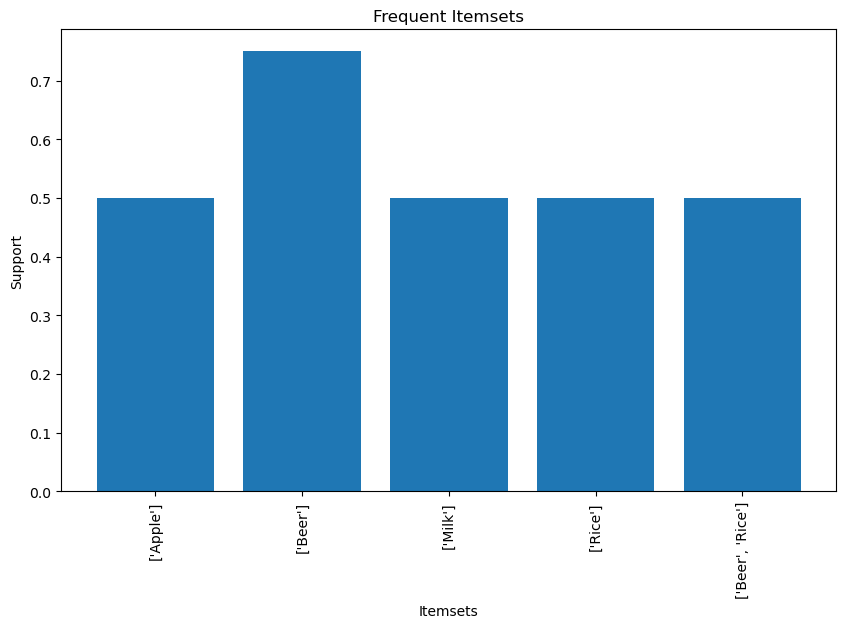

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

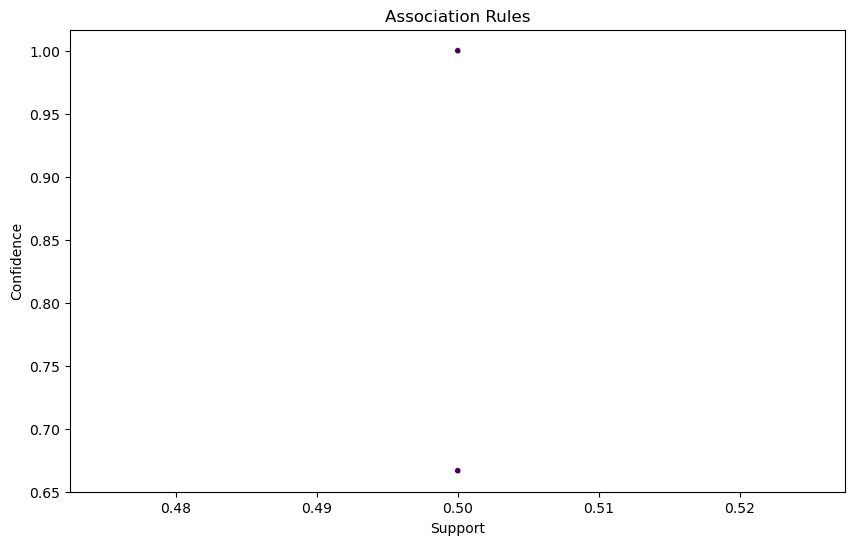

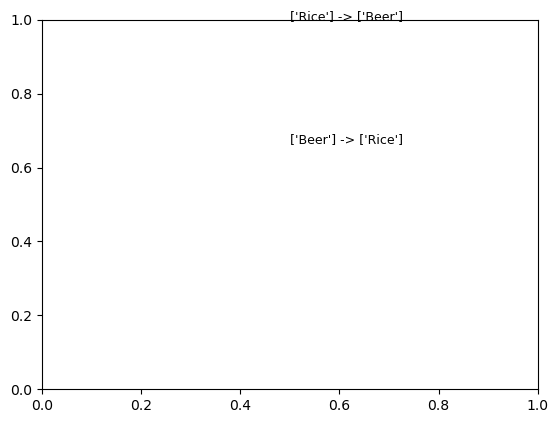

In [18]:
# Visualization of Frequent Itemsets
plt.figure(figsize=(10, 6))
plt.bar(x=range(len(frequent_itemsets)), height=frequent_itemsets['support'], tick_label=[str(list(x)) for x in frequent_itemsets['itemsets']])
plt.xticks(rotation=90)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets')
plt.show()

# Visualization of Association Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', legend=False, sizes=(20, 200))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()

# Optionally, for better visualization, you can label the scatter plot points with antecedents and consequents
for i in range(rules.shape[0]):
    plt.text(rules.support[i], rules.confidence[i], f'{list(rules.antecedents[i])} -> {list(rules.consequents[i])}', fontsize=9)

plt.show()